# Framework installation

In [ ]:
pip install qiskit --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.3 MB/s eta 0:00:00


In [ ]:
pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 21.4 MB/s eta 0:00:00


In [ ]:
pip install pylatexenc --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT, PhaseGate
from qiskit_aer import Aer
import matplotlib.pyplot as plt
import numpy as np
from qiskit import ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit.circuit.library.standard_gates import HGate, XGate, ZGate


# 1. Bell States
Create circuits to create the four famous Bell states! Create a circuit to
create an entanglement of three quantum bits!

## |Ψ+⟩


In [ ]:
qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.cx(0,1)

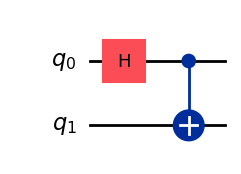

In [ ]:
qc1.draw(output='mpl')

## |Ψ−⟩

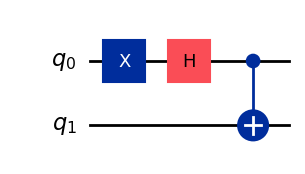

In [ ]:
qc2 = QuantumCircuit(2)
qc2.x(0)
qc2.h(0)
qc2.cx(0,1)

qc2.draw(output='mpl')

## |Φ+⟩

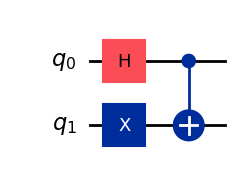

In [ ]:
qc3 = QuantumCircuit(2)
qc3.x(1)
qc3.h(0)
qc3.cx(0,1)

qc3.draw(output='mpl')

## |Φ-⟩

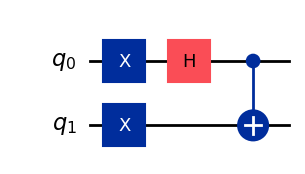

In [ ]:
qc4 = QuantumCircuit(2)
qc4.x(0)
qc4.x(1)
qc4.h(0)
qc4.cx(0,1)

qc4.draw(output='mpl')

##  Create a circuit to create an entanglement of three quantum bits!

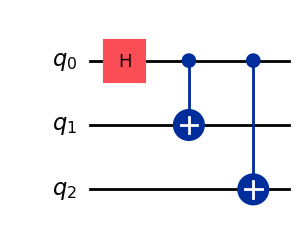

In [ ]:
qc_3eq = QuantumCircuit(3)
qc_3eq.h(0)
qc_3eq.cx(0,1)
qc_3eq.cx(0,2)
qc_3eq.draw(output='mpl')

# 2. Superdense Coding

In [ ]:
# Let's define the Circuit like Bellpair - encoding of the message - decoding of the message
def bellpair():
  qc_sdc = QuantumCircuit(2,2)
  qc_sdc.h(0)
  qc_sdc.cx(0,1)
  return qc_sdc

def encoding(qc_sdc, message):
  if message == "00":
    pass
  elif message == "01":
    qc_sdc.x(0)
  elif message == "10":
    qc_sdc.z(0)
  elif message == "11":
    qc_sdc.x(0)
    qc_sdc.z(0)

def decoding(qc_sdc):
  qc_sdc.cx(0,1)
  qc_sdc.h(0)
  qc_sdc.measure([0, 1], [1, 0])

In [ ]:
def superdensecoding():
  qc_sdc = bellpair()
  qc_sdc.draw(output='mpl')

  message = input("Enter a 2-bit message (00, 01, 10, 11): ")
  if message not in ["00","01","10","11"]:
    print("Invalid message, consider 00, 01, 10 or 11 as the only allowed input")
    return
  encoding(qc_sdc, message)
  print(" \nBefore encoding")
  print(qc_sdc.draw())

  decoding(qc_sdc)
  print("After decoding and measurement")
  print(qc_sdc.draw())

  #simulation
  backend = Aer.get_backend("qasm_simulator")
  compiled_circuit = transpile(qc_sdc, backend)

  #run simulation
  job_sim = backend.run(compiled_circuit, shots=10, memory=True)
  result_sim = job_sim.result()

  #measurements results
  counts = result_sim.get_counts()

  print(f"Decoded Message for '{message}': {counts}")


In [ ]:
superdensecoding()

Enter a 2-bit message (00, 01, 10, 11): 00
 
Before encoding
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════
               
After decoding and measurement
     ┌───┐          ┌───┐┌─┐
q_0: ┤ H ├──■────■──┤ H ├┤M├
     └───┘┌─┴─┐┌─┴─┐└┬─┬┘└╥┘
q_1: ─────┤ X ├┤ X ├─┤M├──╫─
          └───┘└───┘ └╥┘  ║ 
c: 2/═════════════════╩═══╩═
                      0   1 
Decoded Message for '00': {'00': 10}


In [ ]:
superdensecoding()

Enter a 2-bit message (00, 01, 10, 11): 01
 
Before encoding
     ┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ X ├
     └───┘┌─┴─┐└───┘
q_1: ─────┤ X ├─────
          └───┘     
c: 2/═══════════════
                    
After decoding and measurement
     ┌───┐     ┌───┐     ┌───┐┌─┐
q_0: ┤ H ├──■──┤ X ├──■──┤ H ├┤M├
     └───┘┌─┴─┐└───┘┌─┴─┐└┬─┬┘└╥┘
q_1: ─────┤ X ├─────┤ X ├─┤M├──╫─
          └───┘     └───┘ └╥┘  ║ 
c: 2/══════════════════════╩═══╩═
                           0   1 
Decoded Message for '01': {'01': 10}


In [ ]:
superdensecoding()

Enter a 2-bit message (00, 01, 10, 11): 10
 
Before encoding
     ┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ Z ├
     └───┘┌─┴─┐└───┘
q_1: ─────┤ X ├─────
          └───┘     
c: 2/═══════════════
                    
After decoding and measurement
     ┌───┐     ┌───┐     ┌───┐┌─┐
q_0: ┤ H ├──■──┤ Z ├──■──┤ H ├┤M├
     └───┘┌─┴─┐└───┘┌─┴─┐└┬─┬┘└╥┘
q_1: ─────┤ X ├─────┤ X ├─┤M├──╫─
          └───┘     └───┘ └╥┘  ║ 
c: 2/══════════════════════╩═══╩═
                           0   1 
Decoded Message for '10': {'10': 10}


In [ ]:
superdensecoding()

Enter a 2-bit message (00, 01, 10, 11): 11
 
Before encoding
     ┌───┐     ┌───┐┌───┐
q_0: ┤ H ├──■──┤ X ├┤ Z ├
     └───┘┌─┴─┐└───┘└───┘
q_1: ─────┤ X ├──────────
          └───┘          
c: 2/════════════════════
                         
After decoding and measurement
     ┌───┐     ┌───┐┌───┐     ┌───┐┌─┐
q_0: ┤ H ├──■──┤ X ├┤ Z ├──■──┤ H ├┤M├
     └───┘┌─┴─┐└───┘└───┘┌─┴─┐└┬─┬┘└╥┘
q_1: ─────┤ X ├──────────┤ X ├─┤M├──╫─
          └───┘          └───┘ └╥┘  ║ 
c: 2/═══════════════════════════╩═══╩═
                                0   1 
Decoded Message for '11': {'11': 10}


In [ ]:
#set simulator
backend = Aer.get_backend('qasm_simulator')
job_sim = backend.run(transpile(qc_sdc, backend))
result_sim = job_sim.result()
counts = result_sim.get_counts()


In [ ]:
#set simulator
backend = Aer.get_backend('qasm_simulator')
job_sim = backend.run(transpile(qc, backend), shots=10, memory=True) # 10 repetitions
#get measurement result
result_sim = job_sim.result()
#get count statistics
counts = result_sim.get_counts()


In [ ]:
bellpair()

## Short Python cheatsheet

In [ ]:
#functions

def func1(param1 = "default1", param2 = "default2"):
    return param1 + param2

print(func1("Hello ","World!"))

#if
if 1 > 2:
    print("dont beleive")
elif 1 > 3:
    print("beleive even less")
else:
    print("maybe beleive this")

# for loop
for i in range(5):
    print(i)

#lista
pets = ["dog","cat", "turtle"]
for my_pet in pets:
    print(my_pet)

Hello World!
maybe beleive this
0
1
2
3
4
dog
cat
turtle


# 3. Teleportation Protocol

# 4. BB84 quantum key distribution protocol

# Qiskit code cheatsheet for the lab



In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit.circuit.library.standard_gates import HGate, XGate, ZGate
import numpy as np

q = QuantumRegister(2,'q') #create a quantum register (q[index] indexing for qbits)
c = ClassicalRegister(2,'c') #create a classical register (c[index] indexing for cbits)

qc = QuantumCircuit(q,c) #create a quantum circuit from the reqisters

#Set state of qubits
state1 = Statevector([0.6,0.8]) #Set statevector
qc.initialize(state1,qubits=q[0], normalize=True) #initialize qubit

#quantum gates
qc.h(q[0]) #H
qc.x(q[0]) #X
qc.z(q[0]) #Z
qc.cx(q[0],q[1]) #CNOT


#Statevector from quantum circuit
state_qc = Statevector(qc)

print(state_qc)

#measurement
qc.measure(q[0],c[0])

#classically controlled quantum gates
ch_gate = HGate().c_if(c[0],1) # controlled H,  gate active if c[0] contains a '1'
qc.append(ch_gate, [q[1]])     # append to circuit, gate will operate on q[1]
cx_gate = XGate().c_if(c[0],1) # controlled X,  gate active if c[0] contains a '1'
qc.append(cx_gate, [q[1]])     # append to circuit, gate will operate on q[1]
cz_gate = ZGate().c_if(c[0],1) # controlled Z,  gate active if c[0] contains a '1'
qc.append(cz_gate, [q[1]])     # append to circuit, gate will operate on q[1]

#visual separator
qc.barrier(label = "separartion here")

qc.measure(q[1],c[1])
#draw circuit
qc.draw()



Statevector([-0.14142136+0.j,  0.        +0.j,  0.        +0.j,
             -0.98994949+0.j],
            dims=(2, 2))


<ipython-input-27-b1fb41799815>:32: DeprecationWarning: The method ``qiskit.circuit.singleton._SingletonInstructionOverrides.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  ch_gate = HGate().c_if(c[0],1) # controlled H,  gate active if c[0] contains a '1'
<ipython-input-27-b1fb41799815>:34: DeprecationWarning: The method ``qiskit.circuit.singleton._SingletonInstructionOverrides.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  cx_gate = XGate().c_if(c[0],1) # controlled X,  gate active if c[0] contains a '1'
<ipython-input-27-b1fb41799815>:36: DeprecationWarning: The method ``qiskit.circuit.singleton._SingletonInstructionOverrides.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  cz_gate = ZGate().c_if(c[0],1) # controlled Z,  gate active if c[0] contains a '1'


┌─────────────────────┐┌───┐┌───┐┌───┐     ┌─┐                      »
q_0: ┤ Initialize(0.6,0.8) ├┤ H ├┤ X ├┤ Z ├──■──┤M├──────────────────────»
     └─────────────────────┘└───┘└───┘└───┘┌─┴─┐└╥┘   ┌───┐      ┌───┐   »
q_1: ──────────────────────────────────────┤ X ├─╫────┤ H ├──────┤ X ├───»
                                           └───┘ ║    └─╥─┘      └─╥─┘   »
                                                 ║ ┌────╨────┐┌────╨────┐»
c: 2/════════════════════════════════════════════╩═╡ c_0=0x1 ╞╡ c_0=0x1 ╞»
                                                 0 └─────────┘└─────────┘»
«                 separartion here    
«q_0: ───────────────────░────────────
«        ┌───┐           ░         ┌─┐
«q_1: ───┤ Z ├───────────░─────────┤M├
«        └─╥─┘           ░         └╥┘
«     ┌────╨────┐                   ║ 
«c: 2/╡ c_0=0x1 ╞═══════════════════╩═
«     └─────────┘                   1

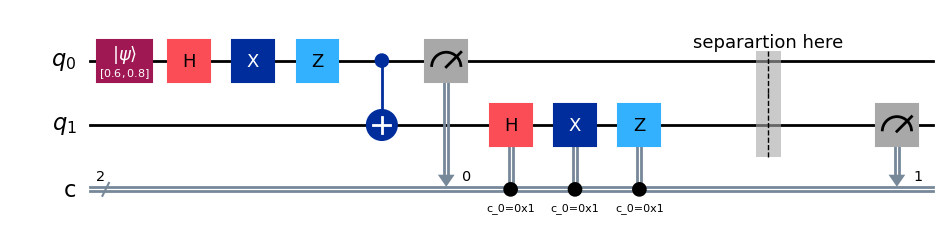

In [ ]:
qc.draw(output='mpl')

In [ ]:
from qiskit_aer import Aer
from qiskit import transpile


#set simulator
backend = Aer.get_backend('qasm_simulator')
job_sim = backend.run(transpile(qc, backend), shots=10, memory=True) # 10 repetitions
#get measurement result
result_sim = job_sim.result()
#get count statistics
counts = result_sim.get_counts()

print(counts) #print counts

#detailed results as a list
mem = result_sim.get_memory() #detailed results

mem_first = [rec[0] for rec in mem] # get results corresponding only to the first qubit
print(mem)
print(mem_first)


{'11': 9, '01': 1}
['11', '01', '11', '11', '11', '11', '11', '11', '11', '11']
['1', '0', '1', '1', '1', '1', '1', '1', '1', '1']


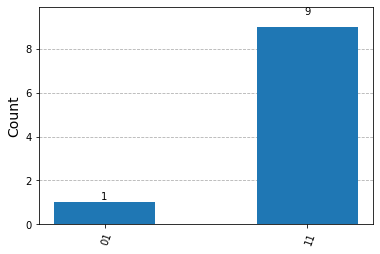

In [ ]:
from qiskit.visualization import plot_histogram
#histogram
plot_histogram(counts)


## Example for getting state vectors from simulation

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer

q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')

qc = QuantumCircuit(q,c)
qc.h(q[0])
qc.cx(q[0],q[1])

qc.save_statevector(label = 'before_meas', pershot = True)
#measurement
qc.measure(q[0],c[0])
qc.save_statevector(label = 'after_meas', pershot = True)

qc.measure(q[1],c[1])

qc.draw()




┌───┐      before_meas ┌─┐ after_meas    
q_0: ┤ H ├──■────────░──────┤M├─────░─────────
     └───┘┌─┴─┐      ░      └╥┘     ░      ┌─┐
q_1: ─────┤ X ├──────░───────╫──────░──────┤M├
          └───┘      ░       ║      ░      └╥┘
c: 2/════════════════════════╩══════════════╩═
                             0              1

In [ ]:
#Trace operation (optional)
#from qiskit.quantum_info import partial_trace

#traced_over_qubits = [qc.qubits.index(qubit) for qubit in range(0,1)]
#density_matrix = partial_trace(state, traced_over_qubits)

#This is for density matrices :)

In [ ]:
from qiskit_aer import Aer
from qiskit import transpile

#szimulátor kijelölse
backend = Aer.get_backend('qasm_simulator')
job_sim = backend.run(transpile(qc, backend), shots=10,memory=True) # 10-szer ismételjük meg a kísérletet, hogy statisztikát kapjunk és elvégezzük a mérést
#mérési eredmény kinyerése
result_sim = job_sim.result()

print(result_sim.data(0)['before_meas'])
print(result_sim.data(0)['after_meas'])

[Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
  

# Laboratory exercises

### 1. Create circuits to create the four famous Bell states! Create a circuit to create an entanglement of three quantum bits!

### 2. Create the protocol for superdense coding! Verify correct operation!

In [ ]:
superdense_message = [0,1]

#Hint:
#Since Qiskit doesnt support setting classical registers directly, there are two recommended ways of setting the meassage:
# 1. Create a new quantum circuit for each message depending on the message
# 2. Use classically controlled quantum gates, and set the cbits by measuring |0> or |1> depending on the message

### Create a quantum teleportation protocol! Verify correct operation!

In [ ]:
state_to_teleport = Statevector([0.6,0.8])

### Create a quantum random number generator! Create the BB84 protocol! Verify correct operation by generating a secret key of at least 20 bits!
(Bonus task: Insert an attacker into the system and detect him!)